In [1]:
from get_true_bvs import *
import numpy as np
from clusters import *
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
from scipy.stats import linregress
import matplotlib.patches as patches

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = [3, 3]
plt.rcParams['font.size'] = 12

In [3]:
bvs = get_true_bvs(init_in_reg=True)
bvs = get_non_tcs(bvs, False)

622 init in reg
613 tracks not TCs


In [4]:
cluster_labels, cluster_centers, cluster_names, sub_cix, clust_bvs=read_clusters(bvs)

reading cluster data from /gws/nopw/j04/forsea/users/jcrook/BorneoVortex/Clusters/
[1 2 3 4 5]
cluster that was subclustered is 0


In [5]:
dic = {clust_bvs[n] : cluster_labels[n] for n in np.arange(0,585)}
nborneo = [bv for bv, label in dic.items() if label == 1]
scs = [bv for bv, label in dic.items() if label == 2]
cshaped = [bv for bv, label in dic.items() if label == 3]
wborneo = [bv for bv, label in dic.items() if label == 4]
nwborneo = [bv for bv, label in dic.items() if label == 5]

In [6]:
years = np.array([ bv.track_times[0].year for bv in bvs ])
year, index, counts = np.unique(years,  return_index = True, return_counts=True)

In [7]:
lifetimes =(np.array([bvs[n].nt for n in range(len(bvs))]))/4

lifetimes_scs =(np.array([scs[n].nt for n in range(len(scs))]))/4
lifetimes_nborneo =(np.array([nborneo[n].nt for n in range(len(nborneo))]))/4
lifetimes_cshaped =(np.array([cshaped[n].nt for n in range(len(cshaped))]))/4
lifetimes_wborneo =(np.array([wborneo[n].nt for n in range(len(wborneo))]))/4
lifetimes_nwborneo=(np.array([nwborneo[n].nt for n in range(len(nwborneo))]))/4

In [8]:
current_index = 0
yearlylifetime = []

for length in counts:
    
    yearlylifetime.append(np.mean(lifetimes[current_index:current_index + length]))

    current_index += length

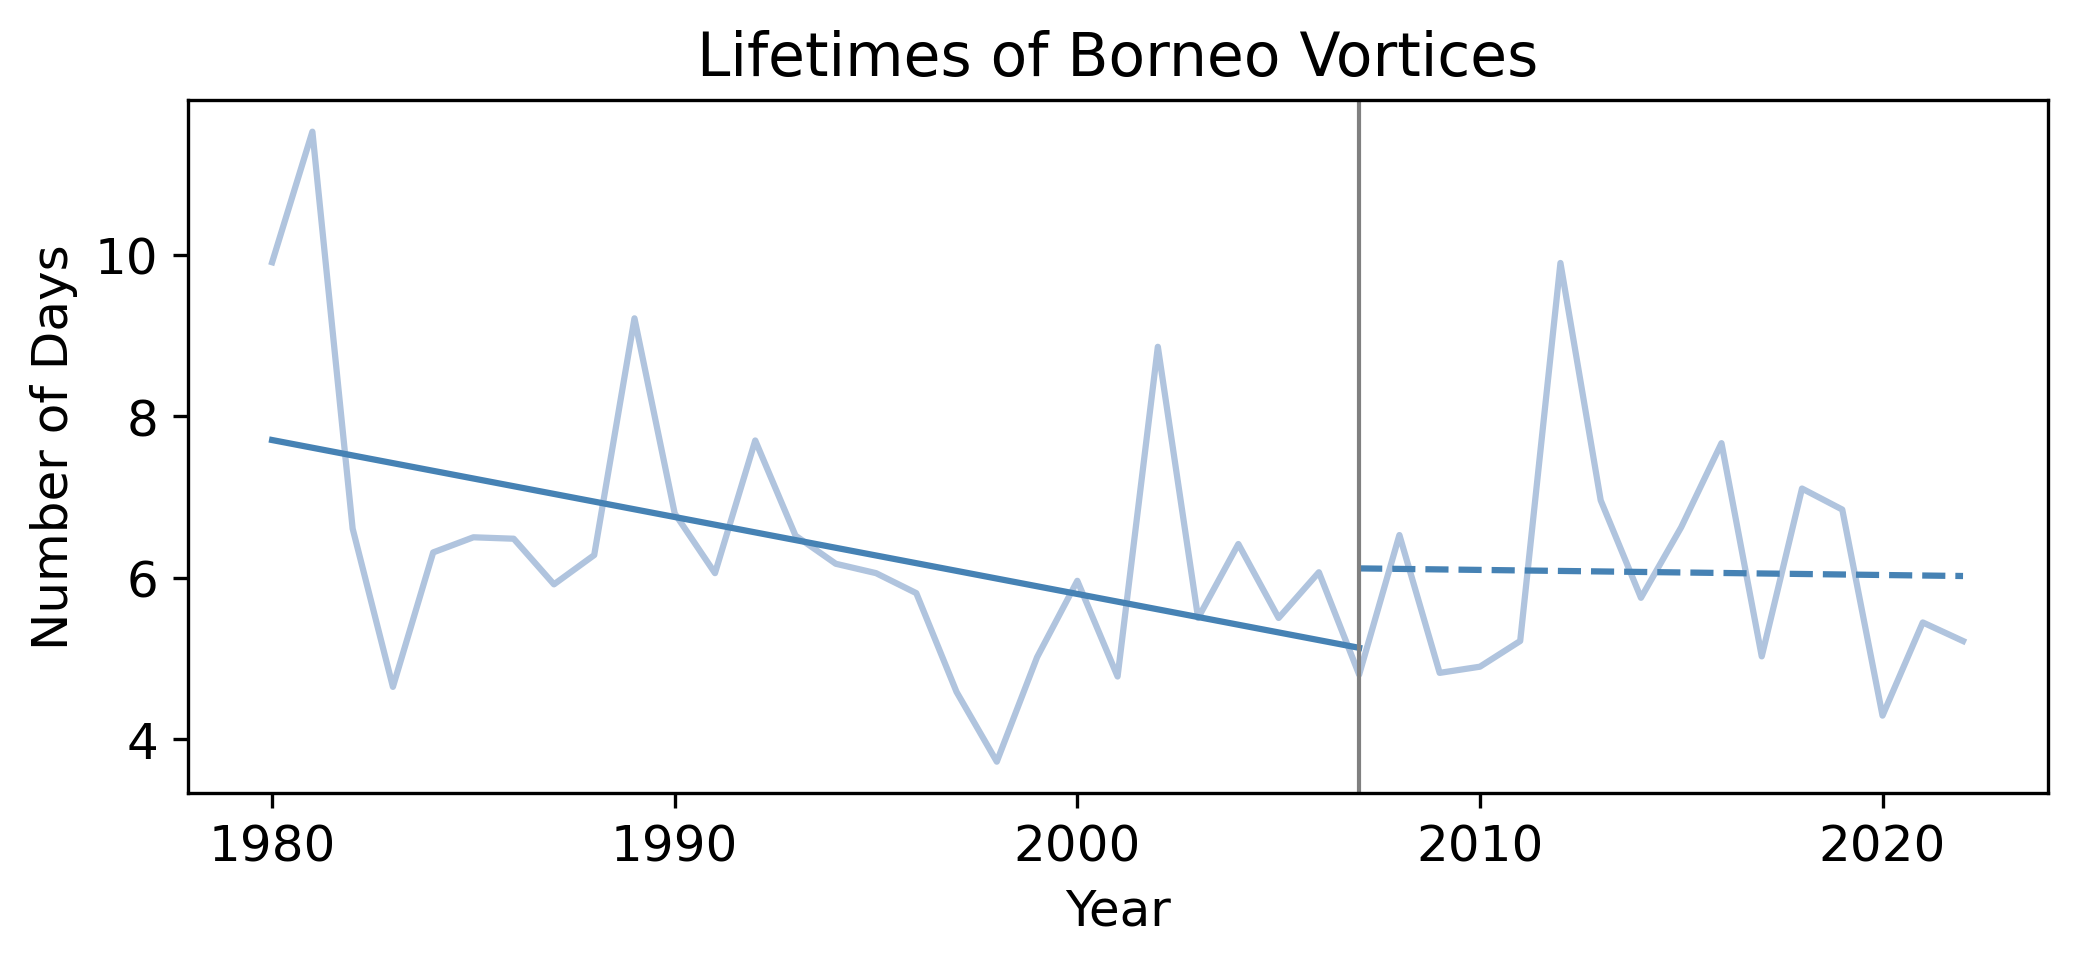

In [9]:
fig, ax = plt.subplots(figsize=(8,3))
ax.set(xlabel='Year', ylabel='Number of Days', title='Lifetimes of Borneo Vortices')
ax.plot(year, yearlylifetime, color='lightsteelblue')

coef = np.polyfit(year[:28],  yearlylifetime[:28],1)
p = np.poly1d(coef)
ax.plot(year[:28], p(year[:28]),linestyle='-', color ='steelblue')

coef = np.polyfit(year[27:],  yearlylifetime[27:],1)
p = np.poly1d(coef)
ax.plot(year[27:], p(year[27:]), color='steelblue', linestyle='--')
ax.axvline(x = 2007, color = 'grey', linewidth=1)

# coef = np.polyfit(year, yearlylifetime,1)
# p = np.poly1d(coef)
# ax.plot(year, p(year))
# ax.axvline(x = 2007, color = 'grey')

In [16]:
def cluster_lifetime(type, titles):

    years = np.array([type[n].track_times[0].year for n in np.arange(0,len(type))])
    year, counts = np.unique(years, return_counts=True)
    lifetimes =(np.array([type[n].nt for n in np.arange(0,len(type))]))/4

    current_index = 0
    yearlylifetime = []
    for length in counts:
    
        yearlylifetime.append(np.mean(lifetimes[current_index:current_index + length]))

        current_index += length
    fig, ax = plt.subplots(figsize=(8,3))
    
    ax.set(xlabel='Year', ylabel='Number of Days', title=titles)
    ax.plot(year, yearlylifetime, color='lightsteelblue', zorder=0)
        
    coef = np.polyfit(year, yearlylifetime,1)
    p = np.poly1d(coef)
    ax.plot(year, p(year), color = 'steelblue')

    print(linregress(year, yearlylifetime))


LinregressResult(slope=-0.09443778422115658, intercept=194.56955921712947, rvalue=-0.530096998943692, pvalue=0.000619296670067077, stderr=0.02517693066090352, intercept_stderr=50.41177768952121)


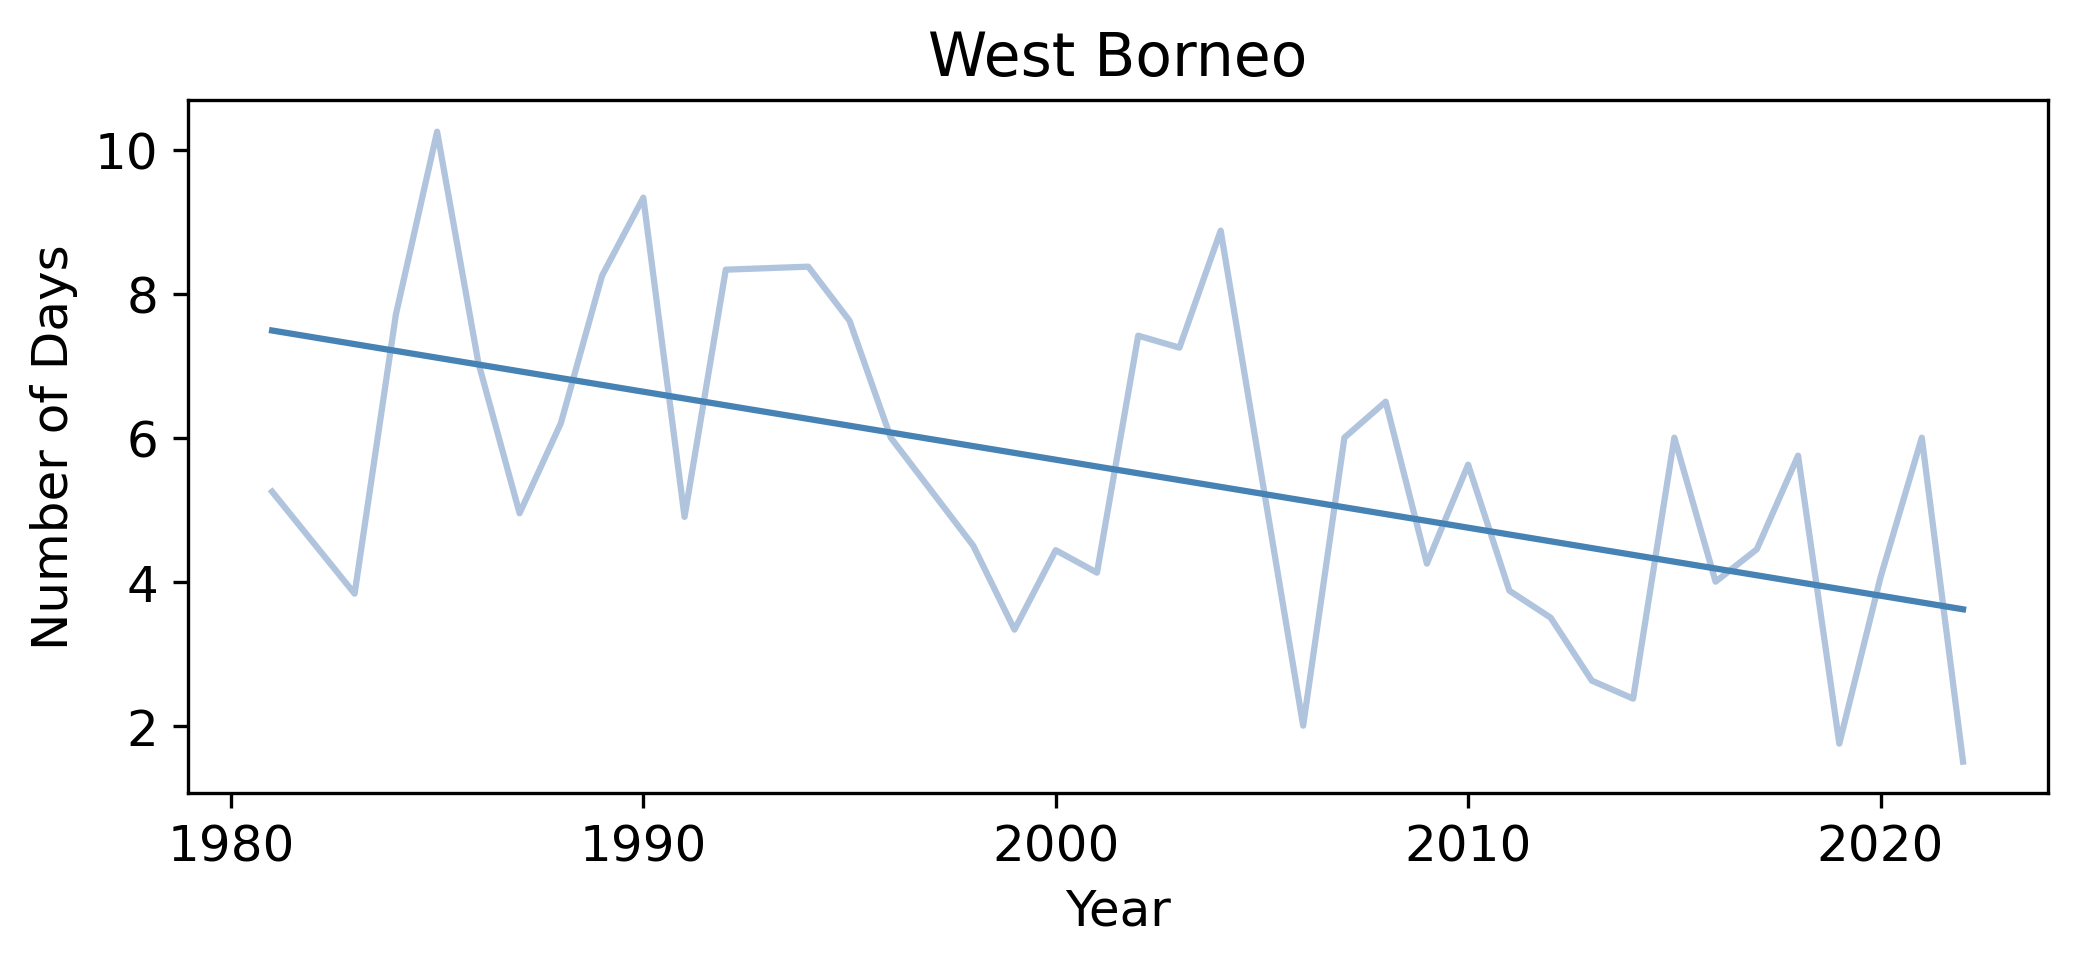

In [18]:
cluster_lifetime(wborneo, 'West Borneo')